In [41]:
import matplotlib.style
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.style.use('seaborn-v0_8-whitegrid')

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [6]:
train.shape

(10886, 12)

In [11]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.info

<bound method DataFrame.info of                   datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0  

In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<Axes: >

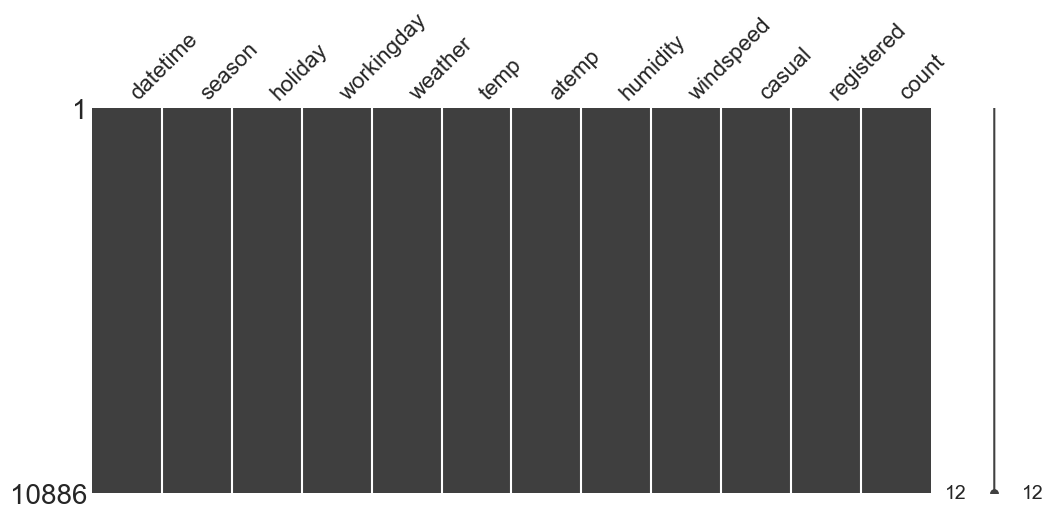

In [14]:
import missingno as msno

msno.matrix(train,figsize=(12,5))

In [20]:
train['datetime']=pd.to_datetime(train['datetime'])
# 문자형일 경우에 datetime으로 변환 후 전처리 진행

In [21]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape

# 컬럼 12개에서 -> 16개로 변경

(10886, 18)

In [22]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


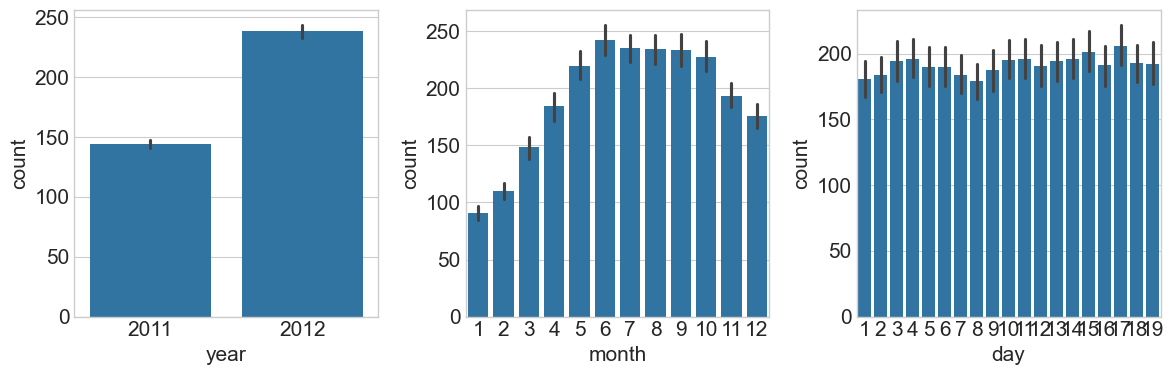

In [43]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
sns.barplot(x='year',y='count',data=train,ax=ax[0])
sns.barplot(x='month',y='count',data=train,ax=ax[1])
sns.barplot(x='day',y='count',data=train,ax=ax[2])
plt.tight_layout()
plt.show()

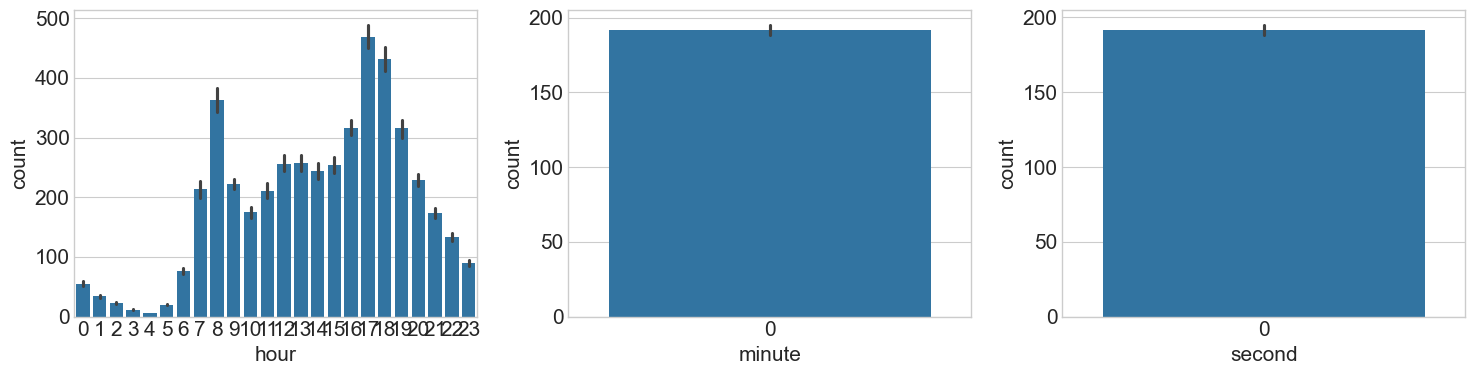

In [38]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
sns.barplot(x='hour',y='count',data=train,ax=ax[0])
sns.barplot(x='minute',y='count',data=train,ax=ax[1])
sns.barplot(x='second',y='count',data=train,ax=ax[2])

plt.tight_layout()
plt.show()

<Axes: xlabel='season', ylabel='count'>

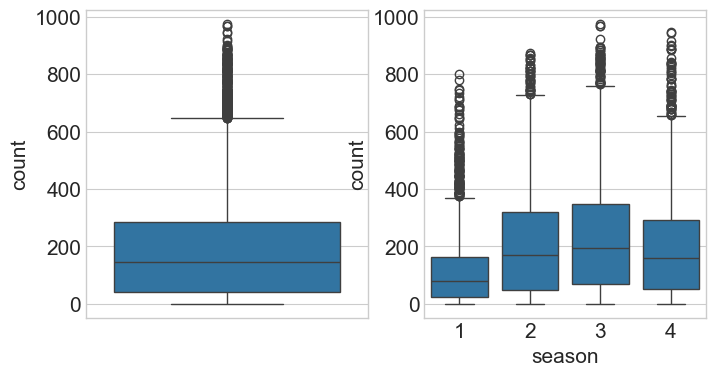

In [47]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
sns.boxplot(orient='v',data=train,y='count',ax=ax[0])
sns.boxplot(data=train,x='season',y='count',ax=ax[1])

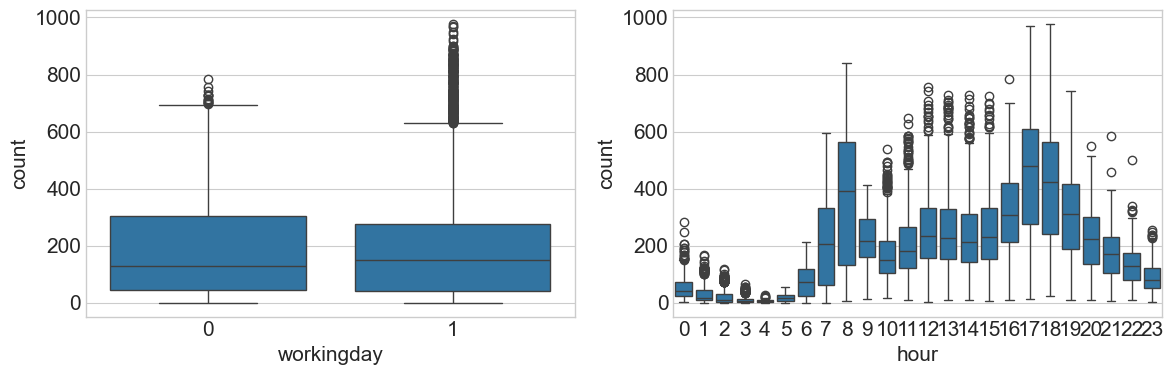

In [50]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=train,x='workingday',y='count',ax=ax[0])
sns.boxplot(data=train,x='hour',y='count',ax=ax[1])

plt.tight_layout()
plt.show()

In [51]:
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [52]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<Axes: xlabel='hour', ylabel='count'>

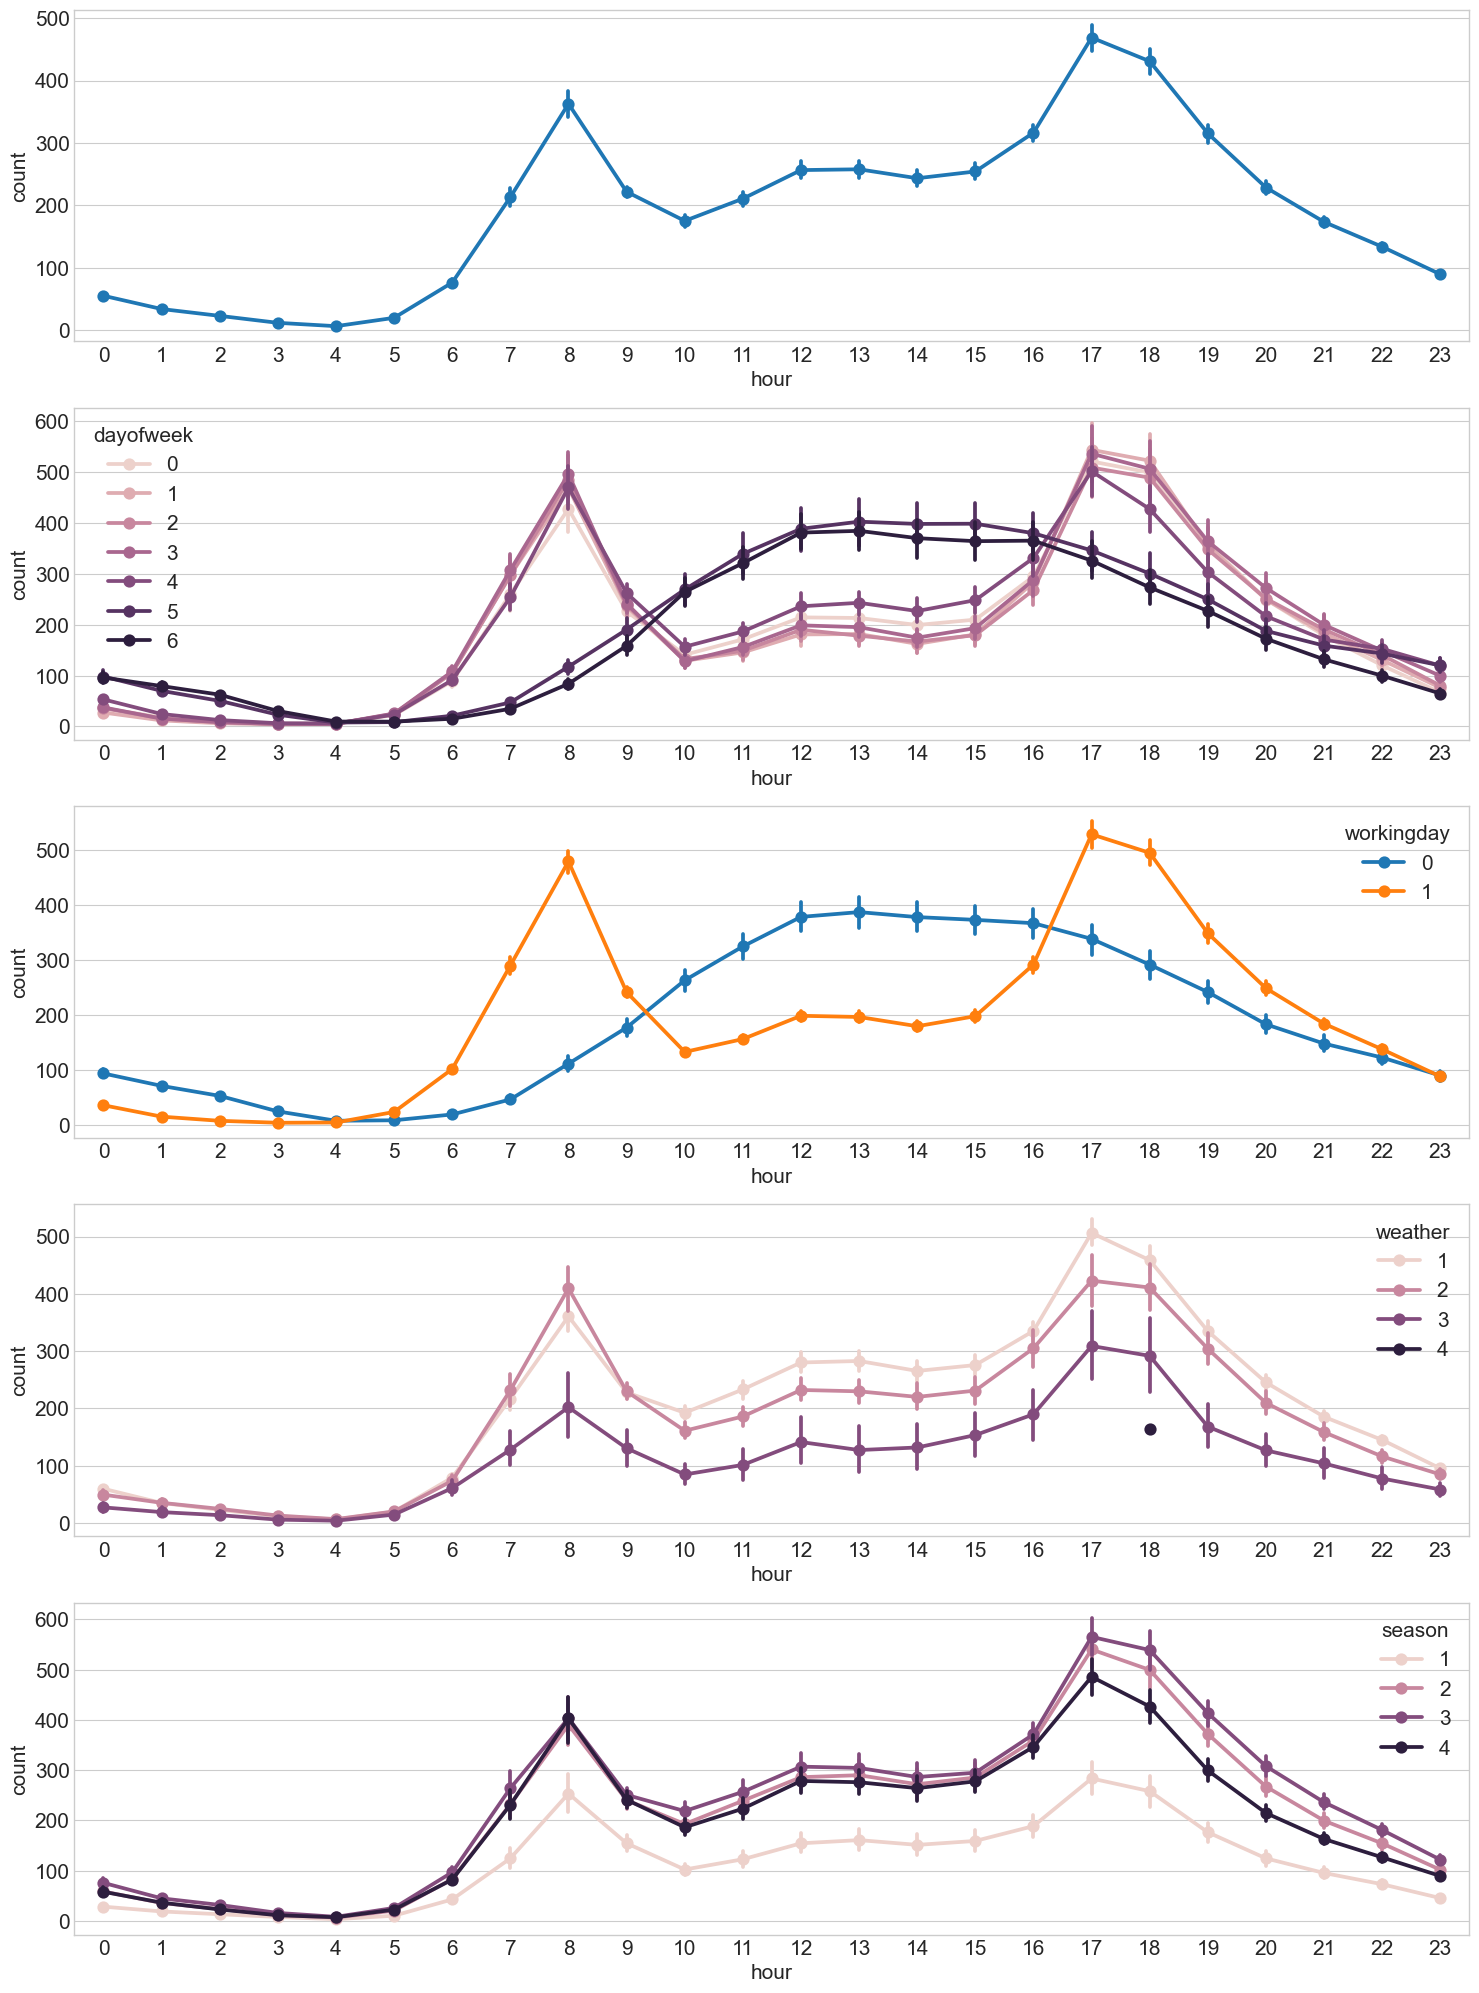

In [54]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train,x='hour',y='count',ax=ax1)

sns.pointplot(data=train,x='hour',y='count',hue='dayofweek',ax=ax2)

sns.pointplot(data=train,x='hour',y='count',hue='workingday',ax=ax3)

sns.pointplot(data=train,x='hour',y='count',hue='weather',ax=ax4)

sns.pointplot(data=train,x='hour',y='count',hue='season',ax=ax5)


In [59]:
corrMatt = train[['temp','atemp', 'humidity', 
                  'windspeed', 'casual', 'registered', 'count']]
corrMatt = corrMatt.corr()

print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000  


<Axes: >

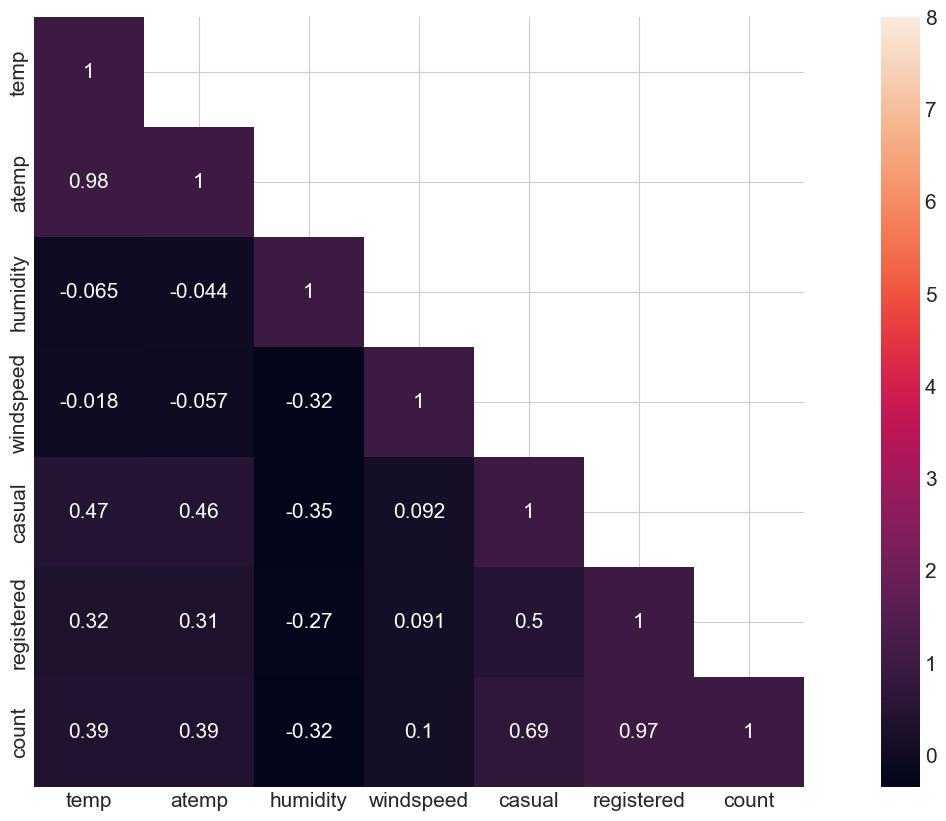

In [60]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask,vmax=8,square=True,annot=True)

registered랑 count의 상관관계가 높다

하지만 test 데이터셋에는 registered에 대한 데이터 값이 없다

temp랑 atemp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에는 적합하지 않을 수 있다

<Axes: xlabel='humidity', ylabel='count'>

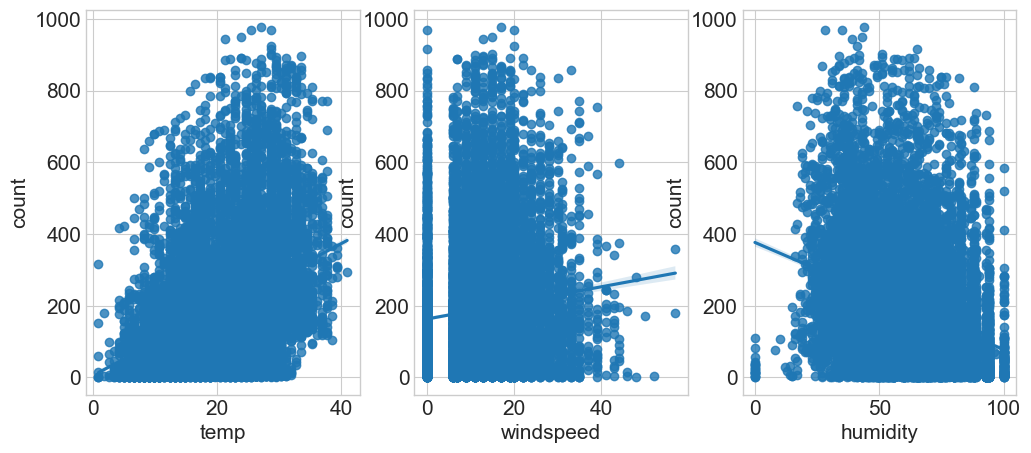

In [62]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data=train,ax=ax[0])
sns.regplot(x='windspeed',y='count',data=train,ax=ax[1])
sns.regplot(x='humidity',y='count',data=train,ax=ax[2])